=== Initial Data ===
  country  points  price     variety
0   Italy      90   25.0     Chianti
1  France      95  120.0    Bordeaux
2      US      88   15.0  Pinot Noir

=== Data Types ===
country     object
points       int64
price      float64
variety     object
dtype: object

=== Missing Values ===
country    1
points     0
price      1
variety    0
dtype: int64

=== Country Statistics ===
        points            price
          mean max count median
country                        
France    94.5  95     2  105.0
Italy     91.0  92     2   30.0
Unknown   90.0  90     1   25.0
US        87.5  88     2   16.5
Spain     85.0  85     1   20.0

=== Best Value Wines ===
  country     variety  points  price  value_ratio
2      US  Pinot Noir      88   15.0     5.866667
5      US   Zinfandel      87   18.0     4.833333
3   Spain       Rioja      85   20.0     4.250000


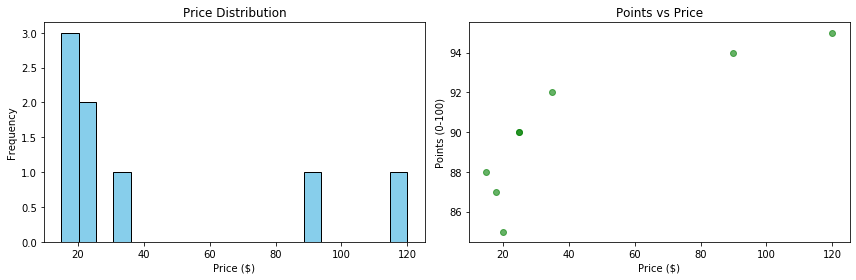


=== Price Outliers ===
Empty DataFrame
Columns: [country, points, price, variety, value_ratio]
Index: []

=== Normalized Points ===
      variety  points  points_normalized
0     Chianti      90                0.5
1    Bordeaux      95                1.0
2  Pinot Noir      88                0.3
3       Rioja      85                0.0
4      Barolo      92                0.7


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ======================
# 1. CREATE SAMPLE DATA
# ======================
data = {
    'country': ['Italy', 'France', 'US', 'Spain', 'Italy', 'US', 'France', None],
    'points': [90, 95, 88, 85, 92, 87, 94, 90],
    'price': [25, 120, 15, 20, 35, 18, 90, np.nan],
    'variety': ['Chianti', 'Bordeaux', 'Pinot Noir', 'Rioja', 
               'Barolo', 'Zinfandel', 'Champagne', 'Merlot']
}
df = pd.DataFrame(data)

# ======================
# 2. DATA INSPECTION
# ======================
print("=== Initial Data ===")
print(df.head(3))
print("\n=== Data Types ===")
print(df.dtypes)
print("\n=== Missing Values ===")
print(df.isnull().sum())

# ======================
# 3. DATA CLEANING
# ======================
# Fill missing price with median
df['price'] = df['price'].fillna(df['price'].median())

# Fill missing country with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Add value ratio (points/price)
df['value_ratio'] = df['points'] / df['price']

# ======================
# 4. DATA ANALYSIS
# ======================
# Top countries by average points
country_stats = df.groupby('country').agg({
    'points': ['mean', 'max', 'count'],
    'price': 'median'
}).sort_values(('points', 'mean'), ascending=False)

print("\n=== Country Statistics ===")
print(country_stats)

# Best value wines (top 3 by points/price ratio)
best_value = df.sort_values('value_ratio', ascending=False).head(3)
print("\n=== Best Value Wines ===")
print(best_value[['country', 'variety', 'points', 'price', 'value_ratio']])

# ======================
# 5. VISUALIZATION
# ======================
plt.figure(figsize=(12, 4))

# Plot 1: Price distribution
plt.subplot(1, 2, 1)
df['price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price ($)')

# Plot 2: Points vs. Price
plt.subplot(1, 2, 2)
plt.scatter(df['price'], df['points'], alpha=0.6, color='green')
plt.title('Points vs Price')
plt.xlabel('Price ($)')
plt.ylabel('Points (0-100)')

plt.tight_layout()
plt.show()

# ======================
# 6. ADVANCED EXERCISES
# ======================
# Challenge 1: Find outliers (prices > 2 std dev from mean)
price_std = df['price'].std()
price_mean = df['price'].mean()
outliers = df[df['price'] > (price_mean + 2 * price_std)]
print("\n=== Price Outliers ===")
print(outliers)

# Challenge 2: Normalize points to 0-1 scale
df['points_normalized'] = (df['points'] - df['points'].min()) / (df['points'].max() - df['points'].min())
print("\n=== Normalized Points ===")
print(df[['variety', 'points', 'points_normalized']].head())